In [97]:
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [98]:
def show(image, cmap='gray'): 
    
    plt.figure(figsize=(16, 8))
    plt.subplot(131)
    plt.imshow(image, cmap)
    plt.axis('off')
    
    return None

In [99]:
def save_image(image, name): 
    """save image as a png picture"""
    
    rescaled = (image * 255).astype(np.uint8)
        
    im = Image.fromarray(rescaled)
    im.save(name + ".png")
    
    return None

In [100]:
def create_blob(n): 
    
    """create blob out of n random dots"""
    
    im = np.zeros((size, size))
    points = size * np.random.random((2, n ** 2))
    im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
    im = scipy.ndimage.filters.gaussian_filter(im, sigma= l / (3.5 * n))
    blobs = im > 0.6 * im.mean()
    
    return blobs

In [101]:
def compute_group(image): 
    """ Computes the fundamental group of the image. 
        Basically the number of inside the pattern."""
    
    group = scipy.ndimage.label(np.pad(image, 10, 'constant', constant_values= 1))[1]
    
    return (group - 1)

In [102]:
def largest_component(image): 
    """ Get the largest connected component of a black and white image. 
        We are looking for the black part.
        Entries of the image should be between 0 and 1.
    """
    
    reverted = np.ones(image.shape) - image
    
    label_im, nb_labels = scipy.ndimage.label(reverted)
    
    sizes = scipy.ndimage.sum(reverted, label_im, range(nb_labels + 1))
    
    mask_size = sizes < sizes.max()
    
    remove_pixel = mask_size[label_im]
    remove_pixel.shape
    
    label_im[remove_pixel] = 0
    
    final = np.ones(label_im.shape) - label_im
    
    return (final + 1)

In [103]:
def count_components(image): 
    """ Get the largest connected component of a black and white image. 
        We are looking for the black part.
        Entries of the image should be between 0 and 1.
    """
    
    reverted = np.ones(image.shape) - image
    
    label_im, nb_labels = scipy.ndimage.label(reverted)
    
    return nb_labels

In [104]:
def show_plot(d): 
    """ plot a dictionary """
    
    lists = sorted(d.items())
    
    x, y = zip(*lists)
    
    plt.plot(x,y)
    
    return None

In [105]:
###Test

In [106]:
np.random.seed(8)

In [107]:
size = 512

In [108]:
n = 14

In [109]:
l = 500

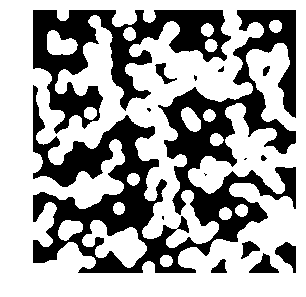

In [146]:
blob = create_blob(n)
show(blob)

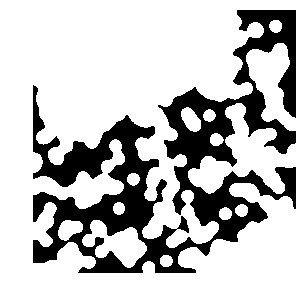

In [147]:
show(largest_component(blob))

In [148]:
label_im, nb_labels = scipy.ndimage.label(blob)

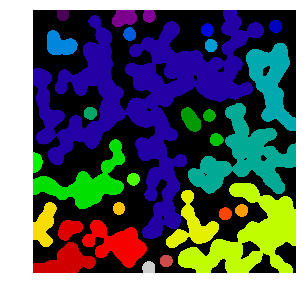

In [149]:
show(label_im, "nipy_spectral")

In [150]:
# Generate dataset

In [151]:
values = [11,12,13,14,15,16,17,18]

In [152]:
for n in values:
    print("Generating blobs with " + str(n) + " constant")
    for i in range(100): 
        blob = create_blob(n)
        name = "./Data/png/" + str(n) + "_" + str(i)
        save_image(blob, name)

Generating blobs with 11 constant
Generating blobs with 12 constant
Generating blobs with 13 constant
Generating blobs with 14 constant
Generating blobs with 15 constant
Generating blobs with 16 constant
Generating blobs with 17 constant
Generating blobs with 18 constant


In [153]:
# Distribution of the fundamental group of the entire picture

In [154]:
groups = {}

for filename in os.listdir("./Data/png/"):
    if filename[-3:] == "png": 
        blobs = Image.open("./Data/png/" + filename)
        key = compute_group(blobs)
        if key in groups.keys(): 
            groups[key] += 1
        else: 
            groups[key] = 1

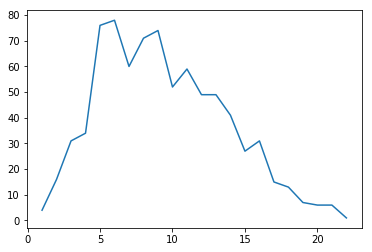

In [155]:
show_plot(groups)

In [122]:
# Distribution of the fundamental group of the largest connected components

In [123]:
fund = {}

for filename in os.listdir("./Raw/"):
    if filename[-3:] == "png": 
        blobs = Image.open("./Raw/" + filename)
        blobs = np.array(blobs)/255
        key = compute_group(largest_component(blobs))
        if key in fund.keys(): 
            fund[key] += 1
        else: 
            fund[key] = 1

In [81]:
show_plot(fund)

ValueError: need more than 0 values to unpack

In [363]:
# Distribution of the number of connected components: 

In [156]:
comps = {}
for filename in os.listdir("./Data/png/"):
    if filename[-3:] == "png": 
        blobs = Image.open("./Data/png/" + filename)
        blobs = np.array(blobs)/255
        key = count_components(blobs)
        if key in comps.keys(): 
            comps[key] += 1
        else: 
            comps[key] = 1

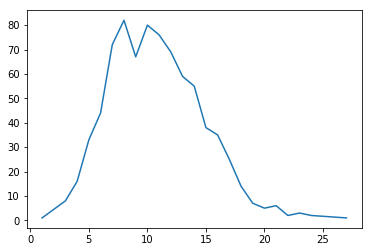

In [157]:
show_plot(comps)

In [126]:
# Select 10000 pictures with uniform distrubion with number of components between 7 and 17

In [127]:
comps = range(8,18)

In [128]:
for comp in comps: 
    counter = 0
    for filename in os.listdir("./Data/png/"):
        if counter == 1000: 
            break
        else:
            if filename[-3:] == "png": 
                blobs = Image.open("./Data/png/" + filename)
                blobs = np.array(blobs)/255
                key = count_components(blobs)
                if key == comp:
                    counter += 1
                    save_image(blobs, "./Data/new/" + filename[:-4])

IOError: [Errno 2] No such file or directory: './Data/new/11_12.png'

In [129]:
# Plot distrubution of the ratio of the largest connected component

In [158]:
def compute_score(image):
    
    reverted = reverted = np.ones(blobs.shape) - blobs
    label_im, nb_labels = scipy.ndimage.label(reverted)
    sizes = scipy.ndimage.sum(reverted, label_im, range(nb_labels + 1))
    total = reverted.sum()
    
    return sizes.max()/total

In [159]:
from tqdm import tqdm

In [160]:
scores = []

for filename in tqdm(os.listdir("./Data/png/")):

    if filename[-3:] == "png": 
        blobs = Image.open("./Data/png/" + filename)
        blobs = np.array(blobs)/255
        score = compute_score(blobs)
        scores.append(score)

100%|██████████| 800/800 [00:05<00:00, 153.09it/s]


In [161]:
len(scores)

800

In [162]:
min(scores)

0.22173958258337534

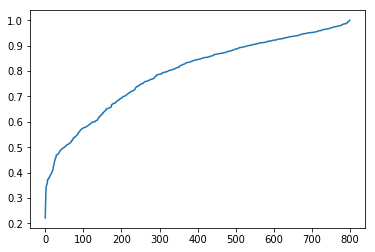

In [163]:
lists = sorted(scores)


plt.plot(lists)
    

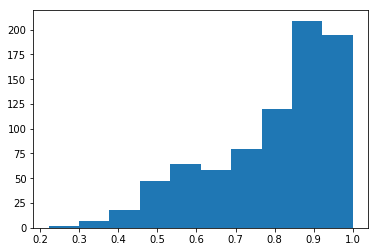

In [164]:
y = np.array(scores)
plt.hist(y);
plt.show()

In [137]:
y.mean()

0.7885916003871776

In [138]:
new_scores = []

for filename in tqdm(os.listdir("./Data/png/")):
    if filename[-3:] == "png": 
        blobs = Image.open("./Data/png/" + filename)
        blobs = np.array(blobs)/255
        score = compute_score(blobs)
        new_scores.append(score)

100%|██████████| 800/800 [00:05<00:00, 151.65it/s]


In [139]:
# Select 10000 random pictures:

In [140]:
import random

In [141]:
for i in tqdm(range(10000)):
    filename = random.choice(os.listdir("./Raw/"))
    if filename[-3:] == "png": 
            blobs = Image.open("./Raw/" + filename)
            blobs = np.array(blobs)/255
            save_image(blobs, "png/" + filename[:-4])

  0%|          | 0/10000 [00:00<?, ?it/s]


IndexError: list index out of range

In [142]:
# Check the distributions

In [143]:
comps = {}
for filename in tqdm(os.listdir("./png/")):
    if filename[-3:] == "png": 
        blobs = Image.open("./png/" + filename)
        blobs = np.array(blobs)/255
        key = count_components(blobs)
        if key in comps.keys(): 
            comps[key] += 1
        else: 
            comps[key] = 1

OSError: [Errno 2] No such file or directory: './png/'

In [144]:
show_plot(comps)

ValueError: need more than 0 values to unpack

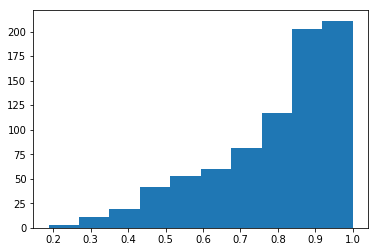

In [145]:
y = np.array(scores)
plt.hist(y);
plt.show()